In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('spam.xlsx')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
3021,ham,Pathaya enketa maraikara pa',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,ham,Can you say what happen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3080,ham,I can't describe how lucky you are that I'm ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2499,spam,Your next amazing xxx PICSFREE1 video will be ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3836,spam,"Free Msg: get Gnarls Barkleys \Crazy\"" rington...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(5407, 10)

## 1.Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5407 non-null   object
 1   v2          5407 non-null   object
 2   Unnamed: 2  76 non-null     object
 3   Unnamed: 3  31 non-null     object
 4   Unnamed: 4  17 non-null     object
 5   Unnamed: 5  5 non-null      object
 6   Unnamed: 6  2 non-null      object
 7   Unnamed: 7  2 non-null      object
 8   Unnamed: 8  1 non-null      object
 9   Unnamed: 9  1 non-null      object
dtypes: object(10)
memory usage: 422.6+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 8','Unnamed: 7','Unnamed: 9'],inplace = True)

In [7]:
df.sample(5)

,v1,v2
2158,ham,haha but no money leh... Later got to go for t...
4308,ham,Ok i msg u b4 i leave my house.
2910,ham,"Love isn't a decision, it's a feeling. If we c..."
1507,ham,Do u konw waht is rael FRIENDSHIP Im gving yuo...
2363,ham,I not busy juz dun wan 2 go so early.. Hee..


In [8]:
df.rename(columns = {'v1':'target','v2':'text'},inplace = True) #It will rename the content
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

809

In [14]:
df = df.drop_duplicates(keep = 'first') #Inorder to remove duplicates

In [15]:
df.shape

(4598, 2)

## 2. EDA

In [16]:
df['target'].value_counts()

target
0    4171
1     427
Name: count, dtype: int64

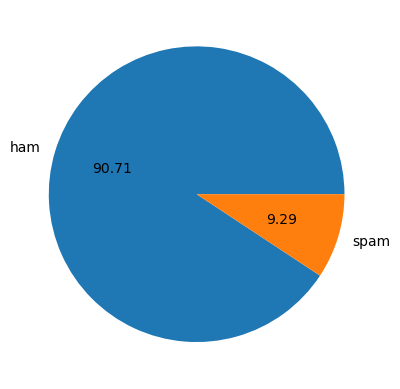

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = "%0.2f")
plt.show()

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maneesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_charecters'] = df['text'].apply(lambda x: len(x) if isinstance(x, str) else None) 
#Here counter no.of alphabets in the word

In [21]:
df.head()

,target,text,num_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111.0
1,0,Ok lar... Joking wif u oni...,29.0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155.0
3,0,U dun say so early hor... U c already then say...,49.0
4,0,"Nah I don't think he goes to usf, he lives aro...",61.0


In [22]:
mask = df['text'].apply(lambda x: isinstance(x, str))

In [23]:
df['num_words'] = df['text'][mask].apply(lambda x: len(nltk.word_tokenize(x)) if isinstance(x, str) else []) 
#Here we divided the entire sentence into its seperate words for that we use word_tokenize and we are counting the no.of words

In [24]:
df.head()

,target,text,num_charecters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111.0,24.0
1,0,Ok lar... Joking wif u oni...,29.0,8.0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,37.0
3,0,U dun say so early hor... U c already then say...,49.0,13.0
4,0,"Nah I don't think he goes to usf, he lives aro...",61.0,15.0


In [25]:
df['num_sentences'] = df['text'][mask].apply(lambda x: len(nltk.sent_tokenize(x)) if isinstance(x, str) else [])
#Here we are counting the no.of sentences using the sent_tokenize

In [26]:
df.head()

,target,text,num_charecters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111.0,24.0,2.0
1,0,Ok lar... Joking wif u oni...,29.0,8.0,2.0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,37.0,2.0
3,0,U dun say so early hor... U c already then say...,49.0,13.0,1.0
4,0,"Nah I don't think he goes to usf, he lives aro...",61.0,15.0,1.0


In [27]:
df[['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,4595.000000,4595.000000,4595.000000
mean,77.641132,18.431774,1.939282
std,64.063532,15.456396,1.478040
min,2.000000,1.000000,1.000000
25%,35.000000,9.000000,1.000000
50%,57.000000,14.000000,1.000000
75%,109.000000,25.000000,2.000000
max,1146.000000,331.000000,38.000000


In [28]:
df[df['target'] ==0][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,4169.000000,4169.000000,4169.000000
mean,71.808347,17.524107,1.845047
std,63.275280,15.651739,1.452701
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,1146.000000,331.000000,38.000000


In [29]:
df[df['target'] ==1][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,426.000000,426.000000,426.000000
mean,134.723005,27.314554,2.861502
std,38.709698,9.627882,1.406563
min,13.000000,2.000000,1.000000
25%,124.000000,23.250000,2.000000
50%,147.000000,28.000000,3.000000
75%,156.000000,32.000000,4.000000
max,545.000000,145.000000,8.000000


In [30]:
import seaborn as sns

<Axes: xlabel='num_charecters', ylabel='Count'>

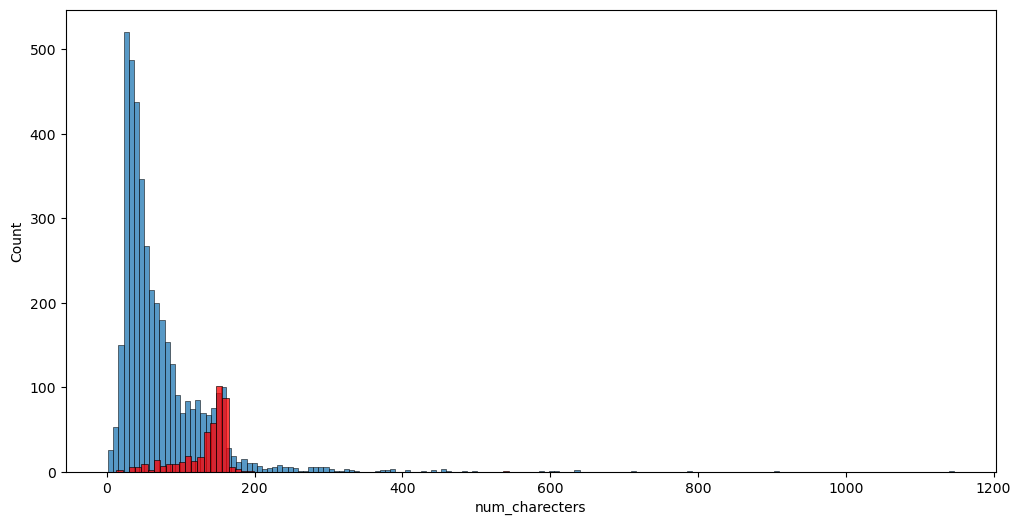

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_charecters'])
sns.histplot(df[df['target'] == 1]['num_charecters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

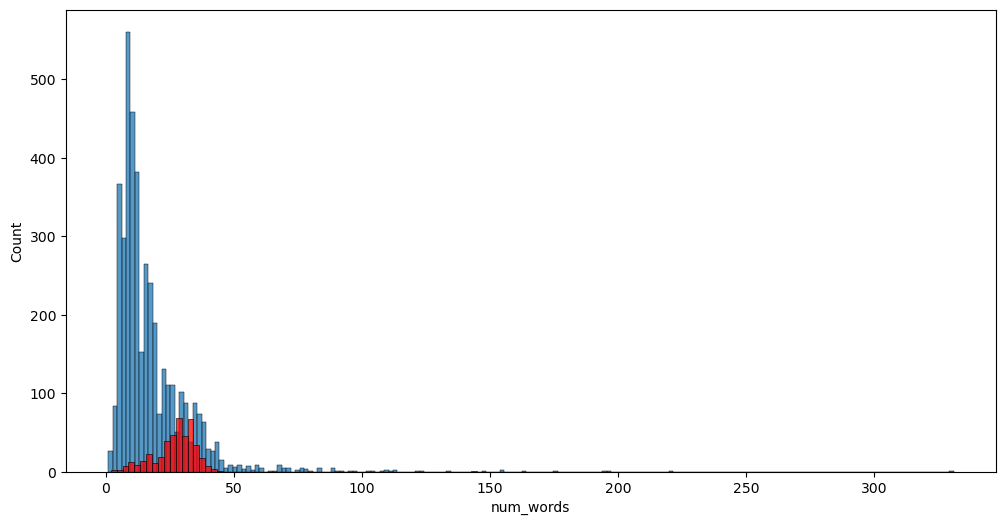

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

C:\Users\Maneesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


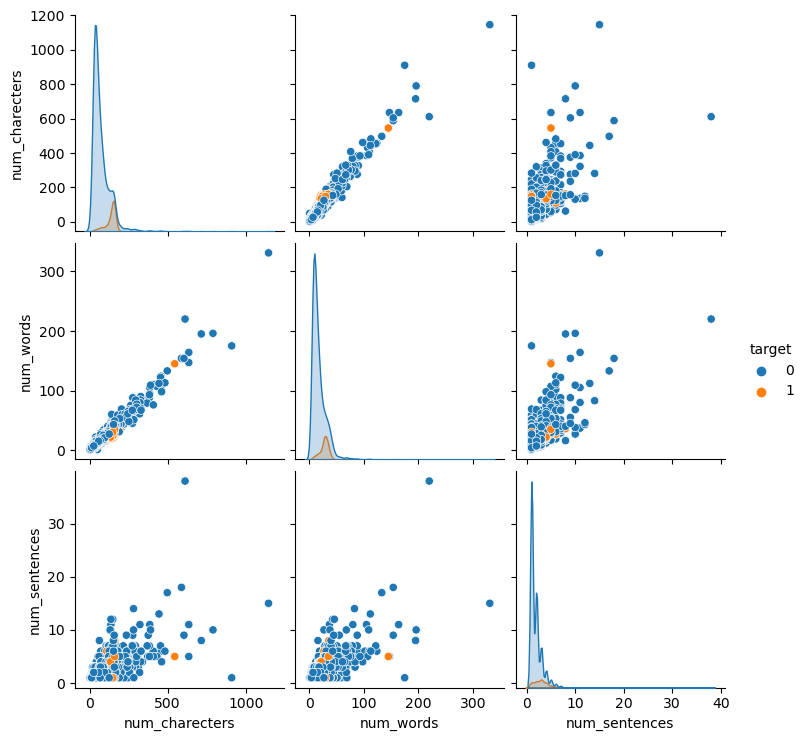

In [33]:
sns.pairplot(df,hue='target')
#Pairplot used to create a grid of scatterplots and histograms that allow you to visualize the relationships between pairs of variables in your dataset

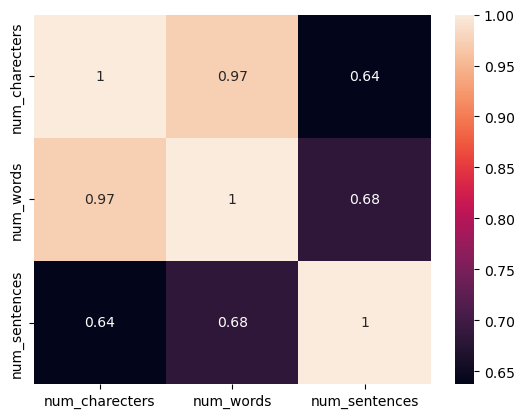

In [34]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## 3. DATA PREPROCESSING 
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [35]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
def transform_text(text):
    if isinstance(text, str):  # Check if 'text' is a string
        text = text.lower()
        text = nltk.word_tokenize(text)
    
        y = []
        for i in text:
            if i.isalnum():
                y.append(i)

        text = y[:]  # Clone the list
        y.clear()

        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
        
        text = y[:]
        y.clear()
    
        for i in text:
            y.append(ps.stem(i)) 

        return " ".join(y)
    else:
        return text  # Return non-string values as they are


In [40]:
transform_text('I loved the YT? ')

'love yt'

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [41]:
df['transformed_text'] = df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,num_charecters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111.0,24.0,2.0,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29.0,8.0,2.0,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,37.0,2.0,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49.0,13.0,1.0,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61.0,15.0,1.0,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size = 10,background_color = 'white')

In [44]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].astype(str).str.cat(sep = " "))

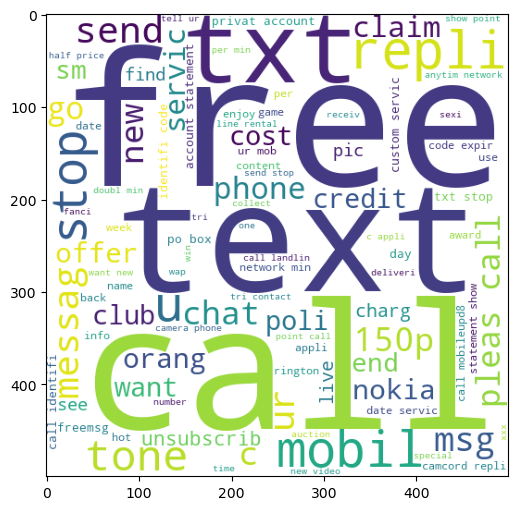

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [46]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].astype(str).str.cat(sep = " "))

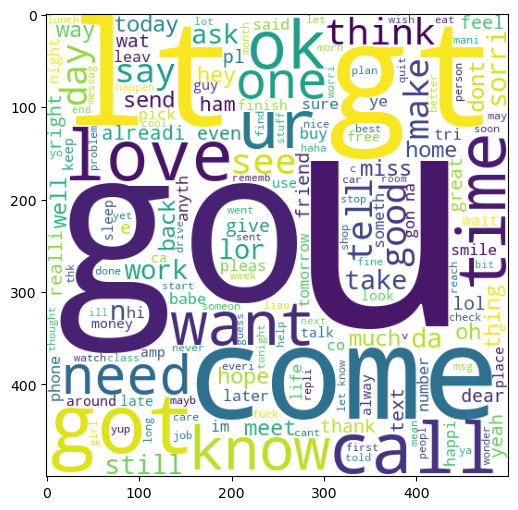

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [48]:
df.head()

,target,text,num_charecters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111.0,24.0,2.0,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29.0,8.0,2.0,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,37.0,2.0,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49.0,13.0,1.0,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61.0,15.0,1.0,nah think goe usf live around though


In [49]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
     if isinstance(msg, str):
        for word in msg.split():
            spam_corpus.append(word)

In [50]:
len(spam_corpus)

6495

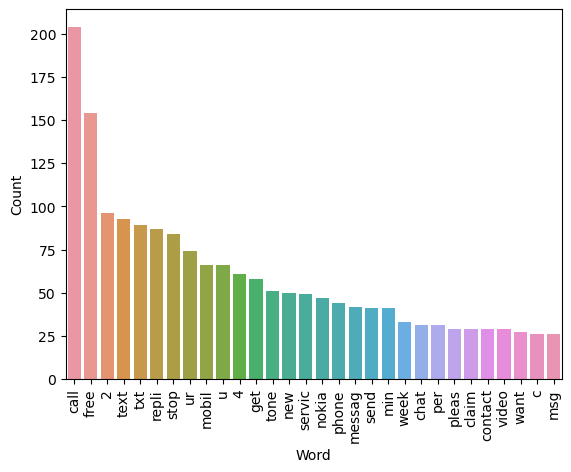

In [51]:
from collections import Counter #This produces the count of words repeated in the dataframe
word_count_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=["Word", "Count"])
sns.barplot(x="Word", y="Count", data=word_count_df)
plt.xticks(rotation='vertical')
plt.show()


In [52]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
     if isinstance(msg, str):
        for word in msg.split():
            ham_corpus.append(word)

In [53]:
len(ham_corpus)

33106

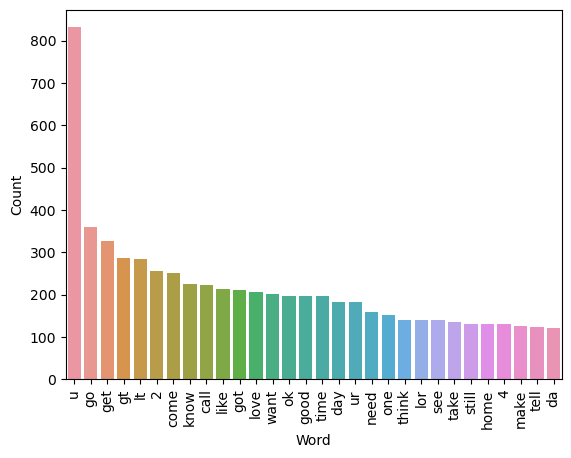

In [54]:
word_count_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=["Word", "Count"])
sns.barplot(x="Word", y="Count", data=word_count_df)
plt.xticks(rotation='vertical')
plt.show()

## 4.Model Building (Navies-Bayes)

In [118]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer #cv is Bag of Words method
cv = CountVectorizer() 
tfidf = TfidfVectorizer(max_features=3000)

In [119]:
df['transformed_text'] = df['transformed_text'].astype(str)

In [120]:
X = tfidf.fit_transform(df['transformed_text']).toarray() #X = cv.fit_transform(df['transformed_text']).toarray() --for cv

In [121]:
X.shape

(4598, 3000)

In [122]:
y = df['target'].values

In [123]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2 )

In [126]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [127]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [128]:
gnb.fit(X_train,y_train)
y_predi = gnb.predict(X_test)
print(accuracy_score(y_test,y_predi))
print(confusion_matrix(y_test,y_predi))
print(precision_score(y_test,y_predi))

0.8695652173913043
[[748  99]
 [ 21  52]]
0.3443708609271523


In [129]:
mnb.fit(X_train,y_train)
y_predi1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_predi1))
print(confusion_matrix(y_test,y_predi1))
print(precision_score(y_test,y_predi1))

0.967391304347826
[[847   0]
 [ 30  43]]
1.0


In [130]:
bnb.fit(X_train,y_train)
y_predi2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_predi2))
print(confusion_matrix(y_test,y_predi2))
print(precision_score(y_test,y_predi2))

0.9771739130434782
[[845   2]
 [ 19  54]]
0.9642857142857143


In [131]:
#tfidf --> MNB

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [97]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [98]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [99]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [100]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9760869565217392, 0.9811320754716981)

In [101]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9760869565217392
Precision -  0.9811320754716981
For  KN
Accuracy -  0.9347826086956522
Precision -  0.9333333333333333
For  NB
Accuracy -  0.967391304347826
Precision -  1.0
For  DT
Accuracy -  0.9445652173913044
Precision -  0.7037037037037037
For  LR
Accuracy -  0.9608695652173913
Precision -  0.9111111111111111
For  RF
Accuracy -  0.9728260869565217
Precision -  0.9615384615384616
For  AdaBoost
Accuracy -  0.9684782608695652
Precision -  0.8793103448275862
For  BgC
Accuracy -  0.9641304347826087
Precision -  0.803030303030303
For  ETC
Accuracy -  0.9782608695652174
Precision -  0.9818181818181818
For  GBDT
Accuracy -  0.9586956521739131
Precision -  0.926829268292683
For  xgb
Accuracy -  0.9717391304347827
Precision -  0.9607843137254902


In [102]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)


In [103]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.967391,1.000000
8,ETC,0.978261,0.981818
0,SVC,0.976087,0.981132
5,RF,0.972826,0.961538
10,xgb,0.971739,0.960784
1,KN,0.934783,0.933333
9,GBDT,0.958696,0.926829
4,LR,0.960870,0.911111
6,AdaBoost,0.968478,0.879310
7,BgC,0.964130,0.803030


In [104]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [105]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.967391
1,ETC,Accuracy,0.978261
2,SVC,Accuracy,0.976087
3,RF,Accuracy,0.972826
4,xgb,Accuracy,0.971739
5,KN,Accuracy,0.934783
6,GBDT,Accuracy,0.958696
7,LR,Accuracy,0.960870
8,AdaBoost,Accuracy,0.968478
9,BgC,Accuracy,0.964130


C:\Users\Maneesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


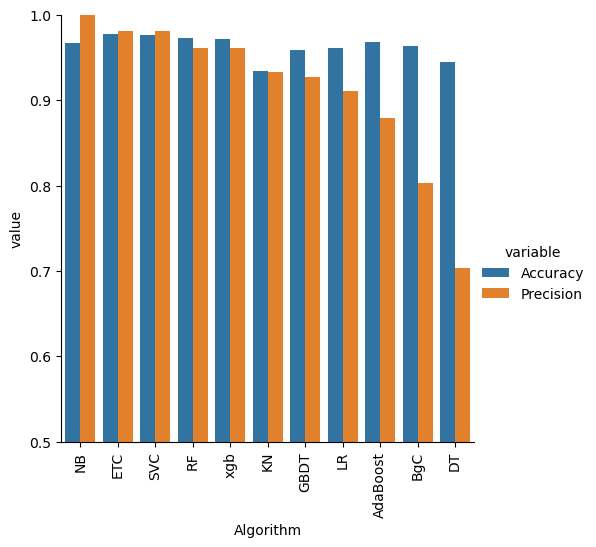

In [106]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [107]:
#model improve
# 1.Change the max_features parameter of TFIDF

In [108]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier 
#A Voting Classifier is an ensemble machine learning model that combines the predictions of multiple individual machine learning models to make a final prediction.

In [109]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [110]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [111]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9804347826086957
Precision 1.0


In [112]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [116]:
from sklearn.ensemble import StackingClassifier 
#Stacking uses a two-level model hierarchy with a meta-model to combine base model predictions, while a Voting Classifier combines base model predictions directly by majority voting or averaging.

In [114]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [115]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9826086956521739
Precision 0.9830508474576272


In [132]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))